In [35]:
!pip install geopandas

In [36]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [37]:
rawdf = pd.read_csv('GreenspaceDownload/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.csv', encoding='unicode_escape', low_memory=False)

In [38]:
rawdf.shape

(36902, 160)

In [39]:
print(list(rawdf.columns))

['ID_HDC_G0', 'QA2_1V', 'AREA', 'BBX_LATMN', 'BBX_LONMN', 'BBX_LATMX', 'BBX_LONMX', 'GCPNT_LAT', 'GCPNT_LON', 'CTR_MN_NM', 'CTR_MN_ISO', 'XBRDR', 'XCTR_NBR', 'XC_NM_LST', 'XC_ISO_LST', 'GRGN_L1', 'GRGN_L2', 'UC_NM_MN', 'UC_NM_LST', 'UC_NM_SRC', 'H75_NBR', 'H90_NBR', 'H00_NBR', 'H75_AREA', 'H90_AREA', 'H00_AREA', 'E_BM_NM_LST', 'E_SL_LST', 'EL_AV_ALS', 'E_KG_NM_LST', 'E_RB_NM_LST', 'E_WR_P_90', 'E_WR_P_00', 'E_WR_P_14', 'E_WR_T_90', 'E_WR_T_00', 'E_WR_T_14', 'B75', 'B90', 'B00', 'B15', 'P75', 'P90', 'P00', 'P15', 'BUCAP75', 'BUCAP90', 'BUCAP00', 'BUCAP15', 'NTL_AV', 'GDP90_SM', 'GDP00_SM', 'GDP15_SM', 'INCM_CMI', 'DEV_CMI', 'TT2CC', 'E_GR_AV90', 'E_GR_AV00', 'E_GR_AV14', 'E_GR_AH90', 'E_GR_AM90', 'E_GR_AL90', 'E_GR_AT90', 'E_GR_AH00', 'E_GR_AM00', 'E_GR_AL00', 'E_GR_AT00', 'E_GR_AH14', 'E_GR_AM14', 'E_GR_AL14', 'E_GR_AT14', 'E_EC2E_E75', 'E_EC2E_E90', 'E_EC2E_E00', 'E_EC2E_E15', 'E_EC2E_R75', 'E_EC2E_R90', 'E_EC2E_R00', 'E_EC2E_R15', 'E_EC2E_I75', 'E_EC2E_I90', 'E_EC2E_I00', 'E_EC2E_I15

In [40]:
cols_to_keep = ['GCPNT_LAT', 'GCPNT_LON', 'CTR_MN_NM', 'UC_NM_MN', 'UC_NM_LST', 'E_GR_AV14', 'E_GR_AT14', 'SDG_A2G14', 'SDG_OS15MX', 'P15', 'B15', 'BUCAP15', 'INCM_CMI', 'DEV_CMI', 'GDP15_SM', 'E_BM_NM_LST', 'E_WR_T_14']
df = rawdf[cols_to_keep]
df = df[df['CTR_MN_NM'] == 'United States']
df.replace(to_replace=['?', '??', '???', 'NAN'], value = [np.nan, np.nan, np.nan, np.nan], inplace=True)
df.rename(columns={'GCPNT_LAT': 'Latitude', 'GCPNT_LON': 'Longitude', 'CTR_MN_NM': 'Country', 'UC_NM_MN': 'Urban Center', 'UC_NM_LST': 'Cities in Urban Center'}, inplace=True)
df.head()

,Latitude,Longitude,Country,Urban Center,Cities in Urban Center,E_GR_AV14,E_GR_AT14,SDG_A2G14,SDG_OS15MX,P15,B15,BUCAP15,INCM_CMI,DEV_CMI,GDP15_SM,E_BM_NM_LST,E_WR_T_14
0,21.340678,-157.893497,United States,Honolulu,Honolulu; Waipahu; Pearl City; Aiea,0.369290388,183.811667,0.226415,56.41,512853.66670,80.647377,157.252219,HIC,MDR,2.192668e+10,Tropical and Subtropical Dry Broadleaf Forests,23.5266223
2,34.923123,-120.434372,United States,Santa Maria,Santa Maria,0.312845526,54.450694,0.040129,23.64,123181.28480,42.000805,340.967420,HIC,MDR,4.174295e+09,"Mediterranean Forests, Woodlands, and Scrub",14.71819115
3,36.607720,-121.882378,United States,Monterey,Monterey,0.358100922,47.815404,0.138683,42.17,67772.28886,27.759470,409.599122,HIC,MDR,1.998786e+09,"Mediterranean Forests, Woodlands, and Scrub",15.27411008
4,34.427664,-119.743693,United States,Santa Barbara,Santa Barbara,0.362784899,59.576284,0.061348,36.5,114753.15020,38.101749,332.032274,HIC,MDR,4.159702e+09,"Mediterranean Forests, Woodlands, and Scrub",15.37690687
5,36.971274,-121.978684,United States,Santa Cruz,Santa Cruz,0.353734305,56.095926,0.109287,39.46,101498.14560,34.507401,339.980601,HIC,MDR,3.890861e+09,"Mediterranean Forests, Woodlands, and Scrub",15.27411008


In [41]:
checker = df[df['Urban Center'].str.contains("?", regex=False)] 
checker

,Latitude,Longitude,Country,Urban Center,Cities in Urban Center,E_GR_AV14,E_GR_AT14,SDG_A2G14,SDG_OS15MX,P15,B15,BUCAP15,INCM_CMI,DEV_CMI,GDP15_SM,E_BM_NM_LST,E_WR_T_14
482,38.777312,-90.611861,United States,O?Fallon,O?Fallon; Saint Charles; Saint Peters; Cottlev...,0.521739986,166.590479,0.790093,75.6,237694.5714,103.865478,436.970344,HIC,MDR,6.452351e+09,"Temperate Grasslands, Savannas, and Shrublands",13.77023435


In [42]:
a1 = df.loc[482]['Cities in Urban Center']
a1replace = a1.replace('?', "'")

In [43]:
df.at[482, 'Urban Center'] = "O'Fallon"
df.at[482, 'Cities in Urban Center'] = a1replace
df.at[553, 'Urban Center'] = 'Minneapolis'

Convert ??? and NAN to NaN, filter to United States, get states and deal with duplicates, remove rows with missing data

In [44]:
mhdf = pd.read_csv('MHDS/Original/500_Cities__City-level_Data__GIS_Friendly_Format___2017_release_20240514.csv')
mhdf.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,AL,Birmingham,107000,212237,19.6,"(19.2, 20.0)",19.8,"(19.5, 20.2)",30.9,"(30.8, 31.1)",...,"(46.6, 47.0)",5.2,"( 5.1, 5.3)",5.2,"( 5.1, 5.2)",26.1,"(25.1, 27.2)",25.9,"(25.0, 26.9)","(33.52756637730, -86.7988174678)"
1,AL,Hoover,135896,81619,9.7,"( 9.3, 10.1)",9.9,"( 9.5, 10.4)",25.3,"(25.0, 25.7)",...,"(34.2, 35.0)",2.2,"( 2.1, 2.3)",2.2,"( 2.1, 2.2)",9.6,"( 8.6, 10.8)",9.5,"( 8.5, 10.9)","(33.37676027290, -86.8051937568)"
2,AL,Huntsville,137000,180105,15.1,"(14.7, 15.4)",15.1,"(14.8, 15.5)",27.5,"(27.3, 27.7)",...,"(39.4, 40.0)",3.4,"( 3.3, 3.4)",3.3,"( 3.2, 3.3)",14.9,"(14.1, 15.7)",14.7,"(13.8, 15.5)","(34.69896926710, -86.6387042882)"
3,AL,Mobile,150000,195111,16.9,"(16.6, 17.2)",17.2,"(16.9, 17.5)",30.5,"(30.3, 30.6)",...,"(42.0, 42.4)",4.4,"( 4.3, 4.5)",4.1,"( 4.1, 4.2)",24.3,"(23.4, 25.3)",24.1,"(23.1, 25.0)","(30.67762486480, -88.1184482714)"
4,AL,Montgomery,151000,205764,17.4,"(17.0, 17.9)",17.5,"(17.1, 17.9)",29.8,"(29.7, 30.0)",...,"(41.0, 41.5)",4.1,"( 4.1, 4.2)",4.2,"( 4.1, 4.3)",21.2,"(20.3, 22.2)",21.2,"(20.1, 22.2)","(32.34726453330, -86.2677059552)"


In [45]:
mh_cities = (mhdf['PlaceName'].unique()).tolist()
mh_cities

['Birmingham',
 'Hoover',
 'Huntsville',
 'Mobile',
 'Montgomery',
 'Tuscaloosa',
 'Anchorage',
 'Avondale',
 'Chandler',
 'Gilbert',
 'Glendale',
 'Mesa',
 'Peoria',
 'Phoenix',
 'Scottsdale',
 'Surprise',
 'Tempe',
 'Tucson',
 'Yuma',
 'Fayetteville',
 'Fort Smith',
 'Jonesboro',
 'Little Rock',
 'Springdale',
 'Alameda',
 'Alhambra',
 'Anaheim',
 'Antioch',
 'Apple Valley',
 'Bakersfield',
 'Baldwin Park',
 'Bellflower',
 'Berkeley',
 'Buena Park',
 'Burbank',
 'Carlsbad',
 'Carson',
 'Chico',
 'Chino',
 'Chino Hills',
 'Chula Vista',
 'Citrus Heights',
 'Clovis',
 'Compton',
 'Concord',
 'Corona',
 'Costa Mesa',
 'Daly City',
 'Downey',
 'El Cajon',
 'Elk Grove',
 'El Monte',
 'Escondido',
 'Fairfield',
 'Folsom',
 'Fontana',
 'Fremont',
 'Fresno',
 'Fullerton',
 'Garden Grove',
 'Hawthorne',
 'Hayward',
 'Hemet',
 'Hesperia',
 'Huntington Beach',
 'Indio',
 'Inglewood',
 'Irvine',
 'Lake Forest',
 'Lakewood',
 'Lancaster',
 'Livermore',
 'Long Beach',
 'Los Angeles',
 'Lynwood',
 

In [46]:
df['Cities in Urban Center_copy'] = df['Cities in Urban Center']
df['Cities in Urban Center'] = df['Cities in Urban Center'].str.split(';')
df = df.explode('Cities in Urban Center')
df.reset_index(inplace=True, drop=False)
df.rename(columns={'index': 'UC Grouping'}, inplace=True)
df['Cities in Urban Center'] = df['Cities in Urban Center'].str.strip()

In [47]:
# filtered_df = df[df["Cities in Urban Center_copy"].str.contains("San Francisco")]
# filtered_df

In [48]:
#t = df[df['Cities in Urban Center'] == 'San Francisco']
#t

In [49]:
ucgroup = df[df['Cities in Urban Center'].isin(mh_cities)]
ucgrouplist = ucgroup.index.tolist()

In [50]:
df = df[df.index.isin(ucgrouplist)]
df.head()

,UC Grouping,Latitude,Longitude,Country,Urban Center,Cities in Urban Center,E_GR_AV14,E_GR_AT14,SDG_A2G14,SDG_OS15MX,P15,B15,BUCAP15,INCM_CMI,DEV_CMI,GDP15_SM,E_BM_NM_LST,E_WR_T_14,Cities in Urban Center_copy
0,0,21.340678,-157.893497,United States,Honolulu,Honolulu,0.369290388,183.811667,0.226415,56.41,512853.6667,80.647377,157.252219,HIC,MDR,2.192668e+10,Tropical and Subtropical Dry Broadleaf Forests,23.5266223,Honolulu; Waipahu; Pearl City; Aiea
4,2,34.923123,-120.434372,United States,Santa Maria,Santa Maria,0.312845526,54.450694,0.040129,23.64,123181.2848,42.000805,340.967420,HIC,MDR,4.174295e+09,"Mediterranean Forests, Woodlands, and Scrub",14.71819115,Santa Maria
6,4,34.427664,-119.743693,United States,Santa Barbara,Santa Barbara,0.362784899,59.576284,0.061348,36.5,114753.1502,38.101749,332.032274,HIC,MDR,4.159702e+09,"Mediterranean Forests, Woodlands, and Scrub",15.37690687,Santa Barbara
8,6,36.688991,-121.640831,United States,Salinas,Salinas,0.339630554,53.886276,0.076114,24.61,149784.3360,41.044956,274.027026,HIC,MDR,4.813837e+09,"Mediterranean Forests, Woodlands, and Scrub",15.27411008,Salinas
9,7,34.217486,-119.209132,United States,Oxnard,Oxnard,0.299903009,135.224578,0.036199,28.65,297806.3934,97.043526,325.861123,HIC,MDR,1.074582e+10,"Mediterranean Forests, Woodlands, and Scrub",17.05357695,Oxnard; Ventura


In [51]:
stateboundaries = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
stateboundaries.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [52]:
def statefinder(row):
    point = Point(row['Longitude'], row['Latitude'])
    state = stateboundaries[stateboundaries.contains(point)]
    
    if not state.empty:
        return state.iloc[0]['STUSPS'] 
    else:
        return np.nan

In [53]:
df['State'] = df.apply(statefinder, axis=1)

In [54]:
df.head()

,UC Grouping,Latitude,Longitude,Country,Urban Center,Cities in Urban Center,E_GR_AV14,E_GR_AT14,SDG_A2G14,SDG_OS15MX,P15,B15,BUCAP15,INCM_CMI,DEV_CMI,GDP15_SM,E_BM_NM_LST,E_WR_T_14,Cities in Urban Center_copy,State
0,0,21.340678,-157.893497,United States,Honolulu,Honolulu,0.369290388,183.811667,0.226415,56.41,512853.6667,80.647377,157.252219,HIC,MDR,2.192668e+10,Tropical and Subtropical Dry Broadleaf Forests,23.5266223,Honolulu; Waipahu; Pearl City; Aiea,HI
4,2,34.923123,-120.434372,United States,Santa Maria,Santa Maria,0.312845526,54.450694,0.040129,23.64,123181.2848,42.000805,340.967420,HIC,MDR,4.174295e+09,"Mediterranean Forests, Woodlands, and Scrub",14.71819115,Santa Maria,CA
6,4,34.427664,-119.743693,United States,Santa Barbara,Santa Barbara,0.362784899,59.576284,0.061348,36.5,114753.1502,38.101749,332.032274,HIC,MDR,4.159702e+09,"Mediterranean Forests, Woodlands, and Scrub",15.37690687,Santa Barbara,CA
8,6,36.688991,-121.640831,United States,Salinas,Salinas,0.339630554,53.886276,0.076114,24.61,149784.3360,41.044956,274.027026,HIC,MDR,4.813837e+09,"Mediterranean Forests, Woodlands, and Scrub",15.27411008,Salinas,CA
9,7,34.217486,-119.209132,United States,Oxnard,Oxnard,0.299903009,135.224578,0.036199,28.65,297806.3934,97.043526,325.861123,HIC,MDR,1.074582e+10,"Mediterranean Forests, Woodlands, and Scrub",17.05357695,Oxnard; Ventura,CA


In [55]:
#states = pd.read_csv('uscities.csv')
#states.sort_values(by='population', ascending=False, inplace=True)
#states = states[['city', 'state_id', 'lat', 'lng']]
#states.rename(columns={'city': 'Urban Center', 'state_id': 'State'}, inplace=True)
#states.drop_duplicates(subset='Urban Center', keep='first', inplace=True)

In [56]:
#dfj = df.join(states.set_index('Urban Center'), on='Cities in Urban Center', how='left')
#dfj

In [57]:
# dfj['lat_diff'] = np.abs(dfj['Latitude'] - dfj['lat'])
# dfj['lng_diff'] = np.abs(dfj['Longitude'] - dfj['lng'])

In [58]:
# check_df = dfj[(dfj['lat_diff'] > 1) | (dfj['lng_diff'] > 1)]
# print(check_df.shape)
# check_df.tail(20)

In [59]:
# dfj.at[21, 'State'] = 'CA'
# dfj.at[37, 'State'] = 'CA'
# dfj.at[47, 'State'] = 'CA'
# dfj.at[77, 'State'] = 'CA'
# dfj.at[116, 'State'] = 'AZ'
# dfj.at[162, 'State'] = 'UT'
# dfj.at[235, 'State'] = 'KS'
# dfj.at[285, 'State'] = 'MO'
# dfj.at[323, 'State'] = 'MN'
# dfj.at[369, 'State'] = 'IL'
# dfj.at[391, 'State'] = 'IL'
# dfj.at[400, 'State'] = 'IL'
# dfj.at[459, 'State'] = 'PA'
# dfj.at[473, 'State'] = 'VA'
# dfj.at[505, 'State'] = 'PA'

# dfj.at[384, 'State'] = 'IN'
# dfj.at[303, 'State'] = 'GA'
# dfj.at[550, 'State'] = 'CT'
# dfj.at[135, 'State'] = 'TX'
# dfj.at[493, 'State'] = 'MD'
# dfj.at[262, 'State'] = 'MO'
# dfj.at[579, 'State'] = 'MA'
# dfj.at[309, 'State'] = 'IL'
# dfj.at[584, 'State'] = 'ME'
# dfj.at[366, 'State'] = 'IN'
# dfj.at[433, 'State'] = 'NC'
# dfj.at[340, 'State'] = 'MN'
# dfj.at[453, 'State'] = 'NC'
# dfj.at[535, 'State'] = 'NJ'
# dfj.at[557, 'State'] = 'NY'


In [60]:
df[df['State'].isna()].head()

,UC Grouping,Latitude,Longitude,Country,Urban Center,Cities in Urban Center,E_GR_AV14,E_GR_AT14,SDG_A2G14,SDG_OS15MX,P15,B15,BUCAP15,INCM_CMI,DEV_CMI,GDP15_SM,E_BM_NM_LST,E_WR_T_14,Cities in Urban Center_copy,State


In [61]:
#dfj = dfj.iloc[:,:-4]

In [62]:
#df.to_csv('greenspace_cleaned.csv')

In [70]:
df['State'].unique()

array(['HI', 'CA', 'AZ', 'NV', 'OR', 'UT', 'WA', 'NM', 'TX', 'ID', 'AK',
       'CO', 'WY', 'OK', 'MT', 'LA', 'KS', 'AR', 'NE', 'MO', 'AL', 'IA',
       'TN', 'SD', 'FL', 'GA', 'ND', 'IL', 'IN', 'MN', 'KY', 'WI', 'OH',
       'SC', 'NC', 'MI', 'VA', 'PA', 'MD', 'NY', 'NJ', 'CT', 'MA', 'RI',
       'NH', 'ME'], dtype=object)

In [64]:
nonnumcols = ['Country', 'Urban Center', 'Cities in Urban Center', 'INCM_CMI', 'DEV_CMI', 
                      'E_BM_NM_LST', 'Cities in Urban Center_copy', 'State']

nonnumcols2 = ['DEV_CMI', 
                      'E_BM_NM_LST', 'State']

dfnum = df.drop(columns=nonnumcols)


In [65]:
corrmatrix2 = dfnum.corr()
corrmatrix2

,UC Grouping,Latitude,Longitude,E_GR_AV14,E_GR_AT14,SDG_A2G14,SDG_OS15MX,P15,B15,BUCAP15,GDP15_SM,E_WR_T_14
UC Grouping,1.000000,0.337626,0.949218,0.796065,-0.222539,0.718223,0.751945,-0.219887,-0.252960,0.257060,-0.197123,-0.403258
Latitude,0.337626,1.000000,0.097046,0.368915,-0.217098,0.322965,0.388467,-0.175479,-0.221509,0.031720,-0.167153,-0.914442
Longitude,0.949218,0.097046,1.000000,0.761299,-0.182422,0.702021,0.693097,-0.201114,-0.213217,0.346062,-0.181272,-0.192042
E_GR_AV14,0.796065,0.368915,0.761299,1.000000,-0.340507,0.917730,0.846621,-0.361839,-0.365674,0.464507,-0.341627,-0.409094
E_GR_AT14,-0.222539,-0.217098,-0.182422,-0.340507,1.000000,-0.391033,-0.411377,0.968755,0.995251,-0.361237,0.955503,0.264764
SDG_A2G14,0.718223,0.322965,0.702021,0.917730,-0.391033,1.000000,0.905945,-0.413822,-0.404840,0.559191,-0.400883,-0.361680
SDG_OS15MX,0.751945,0.388467,0.693097,0.846621,-0.411377,0.905945,1.000000,-0.404019,-0.430944,0.392780,-0.389264,-0.420615
P15,-0.219887,-0.175479,-0.201114,-0.361839,0.968755,-0.413822,-0.404019,1.000000,0.971742,-0.433444,0.997782,0.210763
B15,-0.252960,-0.221509,-0.213217,-0.365674,0.995251,-0.404840,-0.430944,0.971742,1.000000,-0.357370,0.958617,0.260131
BUCAP15,0.257060,0.031720,0.346062,0.464507,-0.361237,0.559191,0.392780,-0.433444,-0.357370,1.000000,-0.433978,-0.098515


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

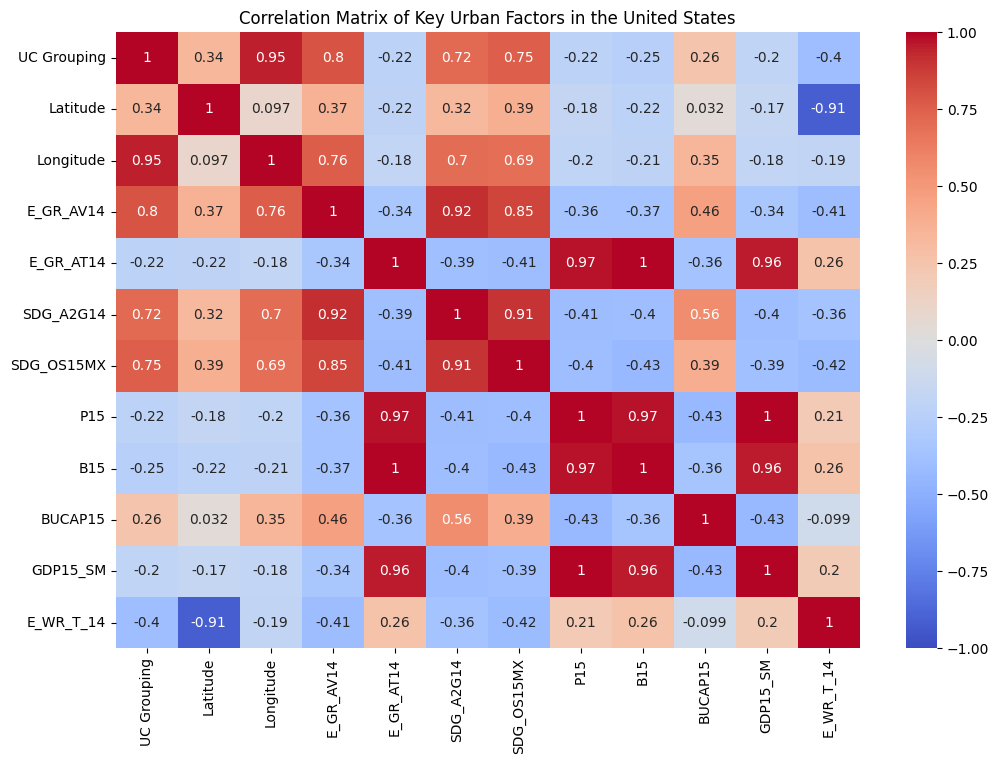

In [67]:
plt.figure(figsize=(12, 8))
sns.heatmap(corrmatrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Urban Factors in the United States')
plt.show()

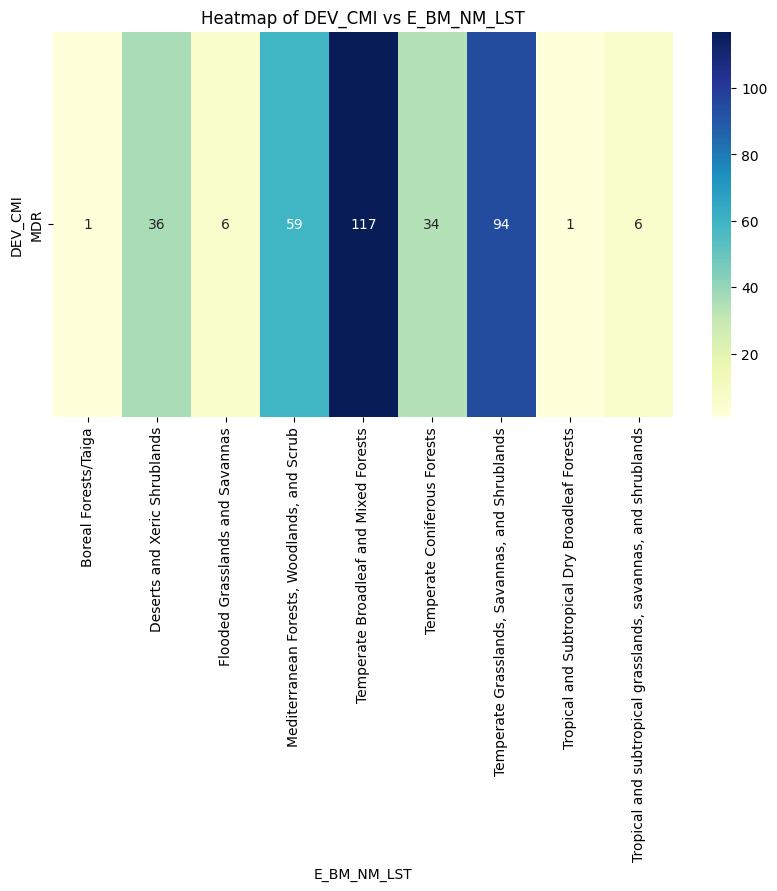

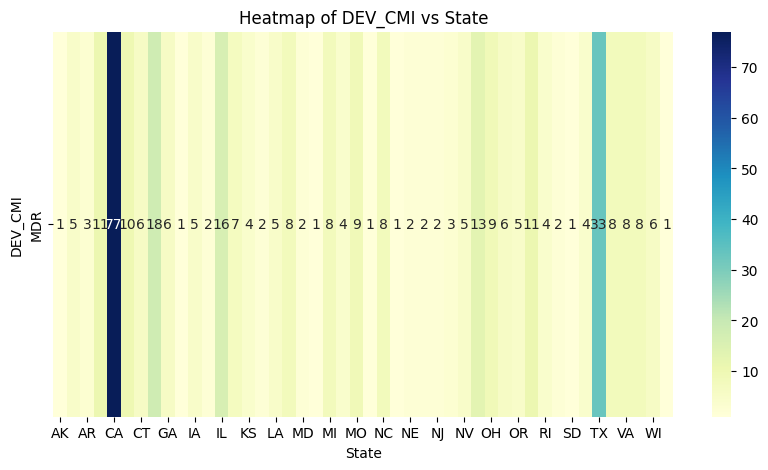

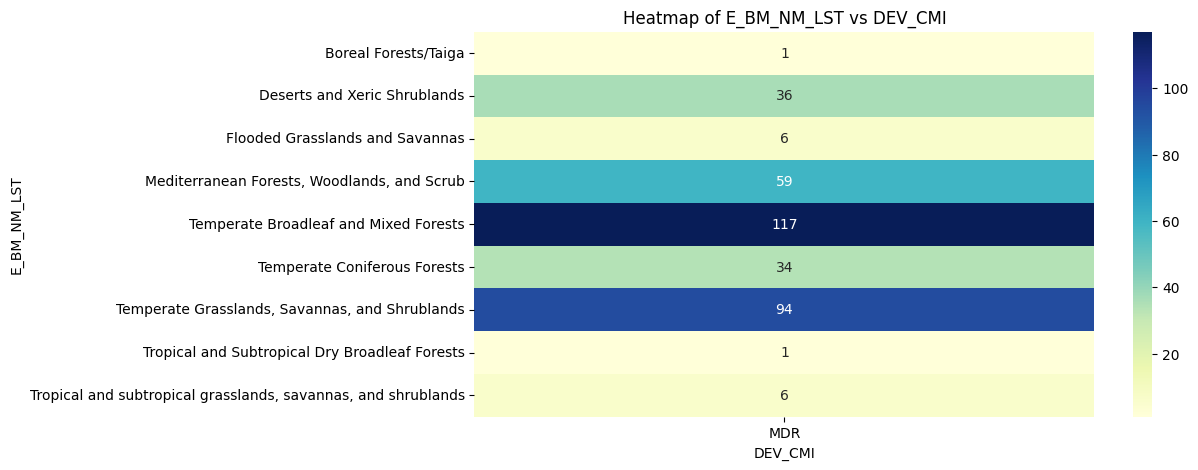

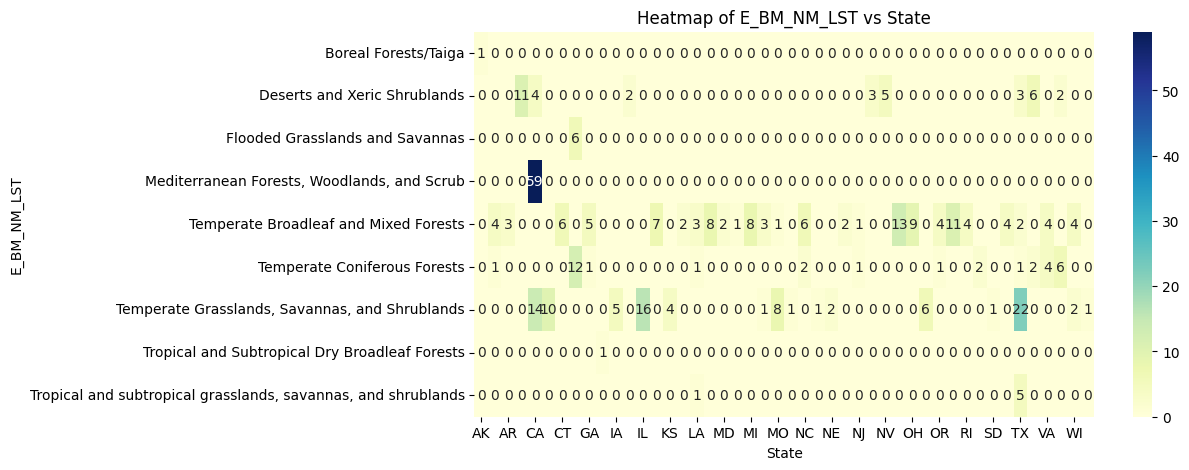

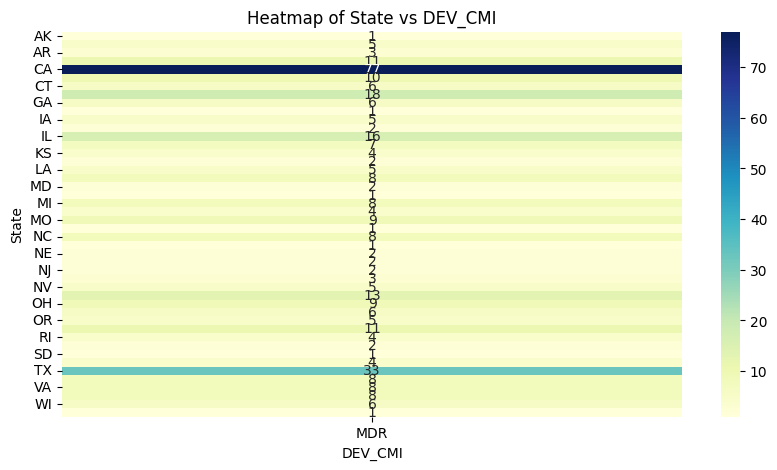

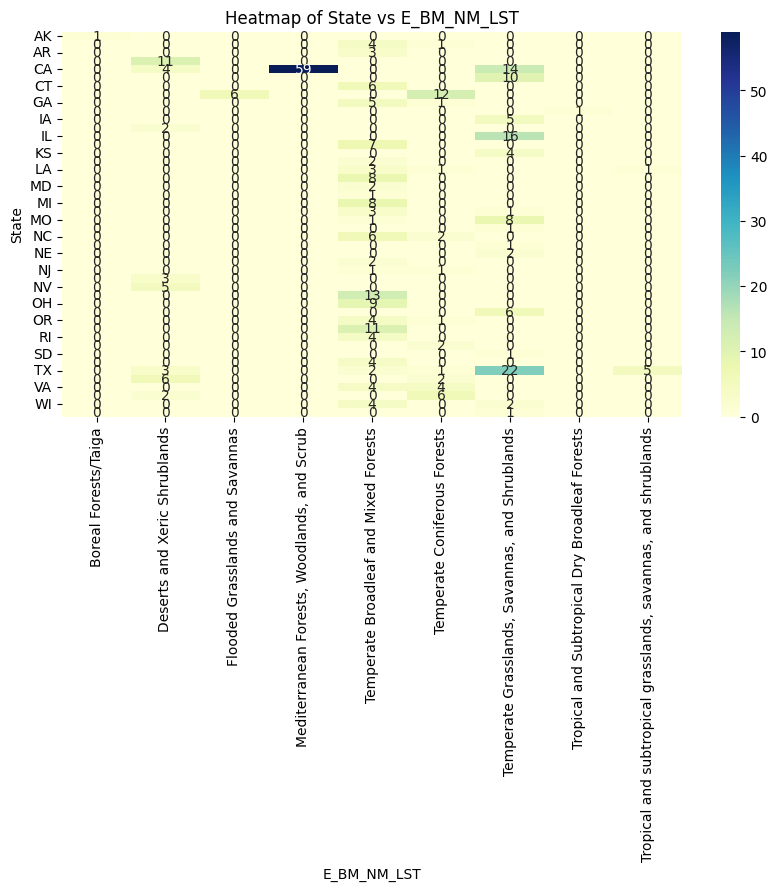

In [68]:
for col1 in nonnumcols2:
    for col2 in nonnumcols2:
        if col1 != col2:
            plt.figure(figsize=(10, 5))
            sns.heatmap(pd.crosstab(df[col1], df[col2]), annot=True, fmt="d", cmap="YlGnBu")
            plt.title(f"Heatmap of {col1} vs {col2}")
            plt.show()